#📌 Extracción

###Importar Datos##

In [1]:
import pandas as pd
import numpy as np

datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()
list_of_records = datos.to_dict('records')
datos = pd.json_normalize(list_of_records)
datos


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Consultando Número de listas y columnas###

In [2]:
datos.shape

(7267, 21)

###Tipo de datos###

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

###Crear y guardar una lista con nombres de columnas###

In [4]:
columnas = list(datos.columns)
columnas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

### Manejo y conversión de tipos de datos###


In [5]:
datos['account.Charges.Total'] = datos['account.Charges.Total'].replace(' ', np.nan)
datos['account.Charges.Total']= datos['account.Charges.Total'].astype(np.float64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
columnas_categoricas = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]
for columnas in columnas_categoricas:
    datos[columnas] = datos[columnas].astype('category')

In [7]:
print(datos.dtypes)

customerID                     object
Churn                        category
customer.gender              category
customer.SeniorCitizen          int64
customer.Partner             category
customer.Dependents          category
customer.tenure                 int64
phone.PhoneService           category
phone.MultipleLines          category
internet.InternetService     category
internet.OnlineSecurity      category
internet.OnlineBackup        category
internet.DeviceProtection    category
internet.TechSupport         category
internet.StreamingTV         category
internet.StreamingMovies     category
account.Contract             category
account.PaperlessBilling     category
account.PaymentMethod        category
account.Charges.Monthly       float64
account.Charges.Total         float64
dtype: object


In [8]:
datos.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90


###Nueva base de datos generada en extensión CSV###

In [9]:
datos.to_csv('datos_generados.csv')
datos.columns = [
    'ID_cliente', 'Cancelamento', 'Genero', 'Idoso', 'Tem_Conjuge', 'Tem_Dependentes',
    'Tempo_de_contrato', 'Telefone_Ativo', 'Multiplas_Linhas',
    'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
    'Fatura_Digital', 'Metodo_Pagamento', 'Valor_Mensal', 'Valor_Total'
]

datos.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


###Tratando los datos nulos###

In [10]:
print(datos.isnull().sum())

ID_cliente               0
Cancelamento             0
Genero                   0
Idoso                    0
Tem_Conjuge              0
Tem_Dependentes          0
Tempo_de_contrato        0
Telefone_Ativo           0
Multiplas_Linhas         0
Tipo_Internet            0
Seguranca_Online         0
Backup_Online            0
Protecao_Dispositivo     0
Suporte_Tecnico          0
Streaming_TV             0
Streaming_Filmes         0
Tipo_Contrato            0
Fatura_Digital           0
Metodo_Pagamento         0
Valor_Mensal             0
Valor_Total             11
dtype: int64


In [11]:
print(datos[datos.isnull().any(axis=1)])


      ID_cliente Cancelamento  Genero  Idoso Tem_Conjuge Tem_Dependentes  \
975   1371-DWPAZ           No  Female      0         Yes             Yes   
1775  2520-SGTTA           No  Female      0         Yes             Yes   
1955  2775-SEFEE           No    Male      0          No             Yes   
2075  2923-ARZLG           No    Male      0         Yes             Yes   
2232  3115-CZMZD           No    Male      0          No             Yes   
2308  3213-VVOLG           No    Male      0         Yes             Yes   
2930  4075-WKNIU           No  Female      0         Yes             Yes   
3134  4367-NUYAO           No    Male      0         Yes             Yes   
3203  4472-LVYGI           No  Female      0         Yes             Yes   
4169  5709-LVOEQ           No  Female      0         Yes             Yes   
5599  7644-OMVMY           No    Male      0         Yes             Yes   

      Tempo_de_contrato Telefone_Ativo  Multiplas_Linhas Tipo_Internet  ...  \
975     

In [12]:
datos['Valor_Total']=datos['Valor_Total'].fillna('0.0')
print(datos.isnull().sum())

ID_cliente              0
Cancelamento            0
Genero                  0
Idoso                   0
Tem_Conjuge             0
Tem_Dependentes         0
Tempo_de_contrato       0
Telefone_Ativo          0
Multiplas_Linhas        0
Tipo_Internet           0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Digital          0
Metodo_Pagamento        0
Valor_Mensal            0
Valor_Total             0
dtype: int64


In [13]:
datos.to_json('datos_generados.json')

In [14]:
import pandas as pd
datos_normalizados = pd.read_json('/content/datos_generados.json')
datos_normalizados.head()


,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [15]:
print(datos_normalizados.isnull().sum())

ID_cliente              0
Cancelamento            0
Genero                  0
Idoso                   0
Tem_Conjuge             0
Tem_Dependentes         0
Tempo_de_contrato       0
Telefone_Ativo          0
Multiplas_Linhas        0
Tipo_Internet           0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Digital          0
Metodo_Pagamento        0
Valor_Mensal            0
Valor_Total             0
dtype: int64


In [16]:
# Verifica y elimina la columna 'ID_cliente' si existe
if 'ID_cliente' in datos.columns:
    datos = datos.drop('ID_cliente', axis=1)
    print("Columna 'ID_cliente' eliminada correctamente.")
else:
    print("⚠️ La columna 'ID_cliente' no existe o ya fue eliminada.")


Columna 'ID_cliente' eliminada correctamente.


In [17]:
datos_normalizados['Valor_Diario']= datos_normalizados['Valor_Mensal'] / 30
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [18]:
datos_normalizados[['Valor_Diario','Valor_Total']]= datos_normalizados[['Valor_Diario','Valor_Total']].round(1)
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.2
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.8,2.5
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.8,3.3
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.8


In [19]:
columnas_binarias = ['Cancelamento', 'Telefone_Ativo', 'Multiplas_Linhas', 'Idoso', 'Tem_Conjuge', 'Tem_Dependentes',
                    'Fatura_Digital', 'Protecao_Dispositivo','Suporte_Tecnico', 'Streaming_Filmes', 'Streaming_TV']
datos_normalizados[columnas_binarias] = datos_normalizados[columnas_binarias].replace({'Yes': 1, 'No': 0})
datos_normalizados.head()

/tmp/ipython-input-19-3047577513.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_normalizados[columnas_binarias] = datos_normalizados[columnas_binarias].replace({'Yes': 1, 'No': 0})


,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.8


In [20]:
datos_normalizados['Tipo_Contrato'] = datos_normalizados['Tipo_Contrato'].replace({'Month-to-month': 'Mensal', 'One year': 'Fidelidade_12_meses', 'Two year': 'Fidelidade_24_meses'})
datos_normalizados['Metodo_Pagamento'] = datos_normalizados['Metodo_Pagamento'].replace({'Electronic check': 'Cheque_Eletronico', 'Mailed check': 'Cheque_Postado', 'Bank transfer (automatic)': 'Transferencia_Bancaria_Automática', 'Credit card (automatic)': 'Cartao_Credito_Automático'})
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [21]:
datos_normalizados['Tipo_Internet'] = datos_normalizados['Tipo_Internet'].replace({'Fiber optic': 'Fibra_Optica', 'DSL': 'Linha_telefonica', 'No': 'Sem_internet'})
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [22]:
datos_normalizados['Genero']= datos_normalizados['Genero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


###Datos Media, Mediana y Desviación Estándar##

In [23]:
datos_normalizados.mean(numeric_only=True).round(2)

,0
Idoso,0.16
Tem_Conjuge,0.48
Tem_Dependentes,0.30
Tempo_de_contrato,32.35
Telefone_Ativo,0.90
Fatura_Digital,0.59
Valor_Mensal,64.72
Valor_Total,2277.18
Valor_Diario,2.16


In [24]:
datos_normalizados.median(numeric_only=True)

,0
Idoso,0.0
Tem_Conjuge,0.0
Tem_Dependentes,0.0
Tempo_de_contrato,29.0
Telefone_Ativo,1.0
Fatura_Digital,1.0
Valor_Mensal,70.3
Valor_Total,1389.2
Valor_Diario,2.3


In [25]:
datos_normalizados.std(numeric_only=True).round(2)

,0
Idoso,0.37
Tem_Conjuge,0.50
Tem_Dependentes,0.46
Tempo_de_contrato,24.57
Telefone_Ativo,0.30
Fatura_Digital,0.49
Valor_Mensal,30.13
Valor_Total,2268.65
Valor_Diario,1.00


###Datos por Item###

In [26]:
datos_normalizados.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,Linha_telefonica,...,0,1,1,0,Fidelidade_12_meses,1,Cheque_Postado,65.6,593.3,2.2
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,Linha_telefonica,...,0,0,0,1,Mensal,0,Cheque_Postado,59.9,542.4,2.0
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra_Optica,...,1,0,0,0,Mensal,1,Cheque_Eletronico,73.9,280.8,2.5
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra_Optica,...,1,0,1,1,Mensal,1,Cheque_Eletronico,98.0,1237.8,3.3
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra_Optica,...,0,1,1,0,Mensal,1,Cheque_Postado,83.9,267.4,2.8


In [27]:
print(datos_normalizados['Genero'].value_counts())
print(datos_normalizados['Tipo_Internet'].value_counts())
print(datos_normalizados['Tipo_Contrato'].value_counts())
print(datos_normalizados['Metodo_Pagamento'].value_counts())
print(datos_normalizados['Cancelamento'].unique())


Genero
Masculino    3675
Feminino     3592
Name: count, dtype: int64
Tipo_Internet
Fibra_Optica        3198
Linha_telefonica    2488
Sem_internet        1581
Name: count, dtype: int64
Tipo_Contrato
Mensal                 4005
Fidelidade_24_meses    1743
Fidelidade_12_meses    1519
Name: count, dtype: int64
Metodo_Pagamento
Cheque_Eletronico                    2445
Cheque_Postado                       1665
Transferencia_Bancaria_Automática    1589
Cartao_Credito_Automático            1568
Name: count, dtype: int64
[0 1 '']


In [28]:
datos_normalizados['Cancelamento'] = datos_normalizados['Cancelamento'].replace({0: 'No', 1: 'Si', '': 'Desconocido'})
datos_normalizados['Cancelamento'].value_counts()

,count
Cancelamento,
No,5174
Si,1869
Desconocido,224


In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Cancelamento          7267 non-null   category
 1   Genero                7267 non-null   category
 2   Idoso                 7267 non-null   int64   
 3   Tem_Conjuge           7267 non-null   category
 4   Tem_Dependentes       7267 non-null   category
 5   Tempo_de_contrato     7267 non-null   int64   
 6   Telefone_Ativo        7267 non-null   category
 7   Multiplas_Linhas      7267 non-null   category
 8   Tipo_Internet         7267 non-null   category
 9   Seguranca_Online      7267 non-null   category
 10  Backup_Online         7267 non-null   category
 11  Protecao_Dispositivo  7267 non-null   category
 12  Suporte_Tecnico       7267 non-null   category
 13  Streaming_TV          7267 non-null   category
 14  Streaming_Filmes      7267 non-null   category
 15  Tipo

###Variables Categóricas

In [30]:
import plotly.express as px

In [31]:
px.histogram(datos, x = 'Cancelamento', text_auto = True)

In [32]:
px.histogram(datos, x = 'Genero', text_auto = True, color = 'Cancelamento', barmode = 'group')

In [33]:
px.histogram(datos, x = 'Tipo_Internet', text_auto = True, color = 'Cancelamento', barmode = 'group')

In [34]:
px.histogram(datos, x = 'Tipo_Contrato', text_auto = True, color = 'Cancelamento', barmode = 'group')

In [35]:
px.histogram(datos, x = 'Metodo_Pagamento', text_auto = True, color = 'Cancelamento', barmode = 'group')

###Variables Numéricas###

In [36]:
px.box(datos, x = 'Idoso', color = 'Cancelamento')

In [37]:
px.box(datos, x = 'Tem_Conjuge', color = 'Cancelamento')

In [38]:
px.box(datos, x = 'Tem_Dependentes', color = 'Cancelamento')

In [39]:
px.box(datos, x = 'Tempo_de_contrato', color = 'Cancelamento')

In [40]:
px.box(datos, x = 'Telefone_Ativo', color = 'Cancelamento')

In [41]:
px.box(datos, x = 'Multiplas_Linhas', color = 'Cancelamento')

In [42]:
px.box(datos, x = 'Protecao_Dispositivo', color = 'Cancelamento')

In [43]:
px.box(datos, x = 'Suporte_Tecnico', color = 'Cancelamento')

In [44]:
px.box(datos, x = 'Streaming_TV', color = 'Cancelamento')

In [45]:
px.box(datos, x = 'Streaming_Filmes', color = 'Cancelamento')

In [46]:
px.box(datos, x = 'Fatura_Digital', color = 'Cancelamento')

In [47]:
px.box(datos, x = 'Valor_Mensal', color = 'Cancelamento')

In [48]:
px.box(datos, x = 'Valor_Total', color = 'Cancelamento')

In [49]:
datos

,Cancelamento,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [50]:
x = datos.drop('Cancelamento', axis = 1)
y = datos['Cancelamento']

In [51]:
x

,Genero,Idoso,Tem_Conjuge,Tem_Dependentes,Tempo_de_contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [52]:
y

,Cancelamento
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


###Transformando las Variables explicativas

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [54]:
columnas = x.columns

In [55]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
['Genero','Tem_Conjuge','Tem_Dependentes','Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento' ]
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [56]:
X = one_hot.fit_transform(x)

In [57]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Genero_Male', 'onehotencoder__Tem_Conjuge_Yes',
       'onehotencoder__Tem_Dependentes_Yes',
       'onehotencoder__Telefone_Ativo_Yes',
       'onehotencoder__Multiplas_Linhas_No',
       'onehotencoder__Multiplas_Linhas_No phone service',
       'onehotencoder__Multiplas_Linhas_Yes',
       'onehotencoder__Tipo_Internet_DSL',
       'onehotencoder__Tipo_Internet_Fiber optic',
       'onehotencoder__Tipo_Internet_No',
       'onehotencoder__Seguranca_Online_No',
       'onehotencoder__Seguranca_Online_No internet service',
       'onehotencoder__Seguranca_Online_Yes',
       'onehotencoder__Backup_Online_No',
       'onehotencoder__Backup_Online_No internet service',
       'onehotencoder__Backup_Online_Yes',
       'onehotencoder__Protecao_Dispositivo_No',
       'onehotencoder__Protecao_Dispositivo_No internet service',
       'onehotencoder__Protecao_Dispositivo_Yes',
       'onehotencoder__Suporte_Tecnico_No',
       'onehotencoder__Suporte_Tecnico_No intern

In [58]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__Genero_Male,onehotencoder__Tem_Conjuge_Yes,onehotencoder__Tem_Dependentes_Yes,onehotencoder__Telefone_Ativo_Yes,onehotencoder__Multiplas_Linhas_No,onehotencoder__Multiplas_Linhas_No phone service,onehotencoder__Multiplas_Linhas_Yes,onehotencoder__Tipo_Internet_DSL,onehotencoder__Tipo_Internet_Fiber optic,onehotencoder__Tipo_Internet_No,...,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Fatura_Digital_Yes,onehotencoder__Metodo_Pagamento_Bank transfer (automatic),onehotencoder__Metodo_Pagamento_Credit card (automatic),onehotencoder__Metodo_Pagamento_Electronic check,onehotencoder__Metodo_Pagamento_Mailed check,remainder__Idoso,remainder__Tempo_de_contrato,remainder__Valor_Mensal,remainder__Valor_Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,9,65.6,593.3
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,9,59.9,542.4
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,4,73.9,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,13,98.0,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,3,83.9,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,13,55.15,742.9
7263,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,22,85.1,1873.7
7264,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,2,50.3,92.75
7265,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,67,67.85,4627.65


###Transformando la variable de respuesta

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 2, ..., 1, 1, 1])

#Ajustando Modelos

###Dividiendo los datos entre entrenamiento y prueba

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

###Modelo de referencia - Baseline

In [61]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)


0.7121629058888277

###Árboles de decisión

In [62]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [63]:

with open("TelecomX_Data.json", "r", encoding="utf-8") as f:
    data_json = json.load(f)

df = pd.json_normalize(data_json)
df = df[df['Churn'].isin(['Yes', 'No'])]

label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

modelo_arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [64]:
modelo_arbol.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [65]:
modelo_arbol.score(X_test, y_test)

0.792238523426408

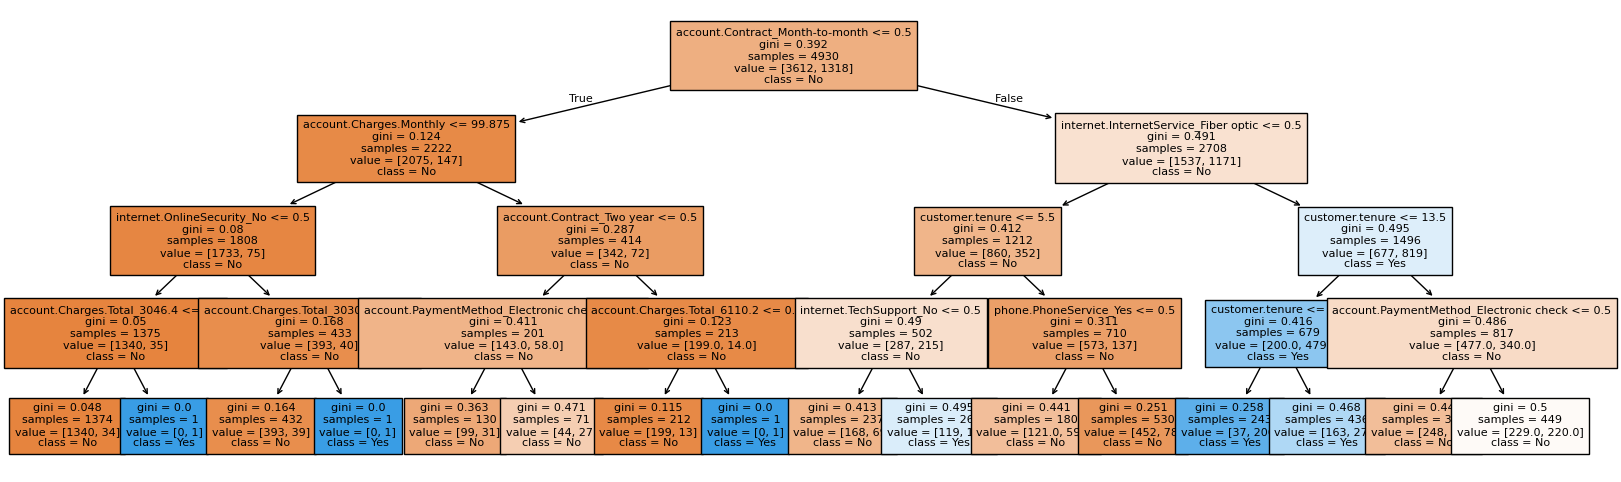

In [66]:
plt.figure(figsize=(20, 6))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Yes'],
          fontsize=8, feature_names=X_encoded.columns)
plt.show()

###Normalizando los datos

In [67]:
from sklearn.preprocessing import MinMaxScaler
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,6565,6566,6567,6568,6569,6570,6571,6572,6573,6574
0,0.0,0.083333,0.724190,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.486111,0.568080,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.263889,0.015461,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.305556,0.602993,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.388889,0.423940,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0.0,0.638889,0.015461,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4926,0.0,0.013889,0.007481,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4927,0.0,0.055556,0.054863,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4928,0.0,0.013889,0.011471,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)
X_test_normalizado = normalizacion.transform(X_test)
knn.score(X_test_normalizado, y_test)

0.7576904874585897

###Escogiendo y seriando el mejor modelo

In [69]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud modelo_arbol: {modelo_arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')

Exactitud Dummy: 0.26076668244202555
Exactitud modelo_arbol: 0.792238523426408
Exactitud KNN: 0.7576904874585897


In [70]:
import pickle
with open('modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)
datos.columns

Index(['Cancelamento', 'Genero', 'Idoso', 'Tem_Conjuge', 'Tem_Dependentes',
       'Tempo_de_contrato', 'Telefone_Ativo', 'Multiplas_Linhas',
       'Tipo_Internet', 'Seguranca_Online', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Valor_Mensal', 'Valor_Total'],
      dtype='object')

In [71]:
nuevo_dato = {'Unnamed: 0', 'customerID', 'Churn', 'customer.gender',
       'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
       'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines',
       'internet.InternetService', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'}

## Validación del modelo
A continuación se muestra la evaluación del árbol de decisión sobre el conjunto de prueba.

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_val_pred = modelo_arbol.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_val_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_val_pred, target_names=["No Churn", "Churn"]))

print("\nPrecisión del modelo en datos de prueba:")
print(accuracy_score(y_test, y_val_pred))

Matriz de Confusión:
[[1424  138]
 [ 301  250]]

Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1562
       Churn       0.64      0.45      0.53       551

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113


Precisión del modelo en datos de prueba:
0.792238523426408


### Visualización de la Matriz de Confusión

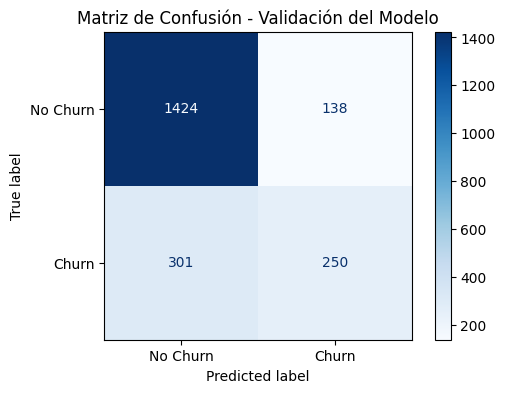

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(modelo_arbol, X_test, y_test,
                                      display_labels=["No Churn", "Churn"],
                                      cmap=plt.cm.Blues,
                                      ax=ax)
plt.title("Matriz de Confusión - Validación del Modelo")
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, modelo_arbol.predict(X_test)).ravel()

precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Especificidad (Specificity): {specificity:.4f}")

if f1_score < 0.1:
    print("El modelo NO es confiable (F1-score muy bajo).")
else:
    print("El modelo tiene una capacidad aceptable de predicción.")


Precisión (Precision): 0.6443
Sensibilidad (Recall): 0.4537
F1-Score: 0.5325
Exactitud (Accuracy): 0.7922
Especificidad (Specificity): 0.9117
El modelo tiene una capacidad aceptable de predicción.


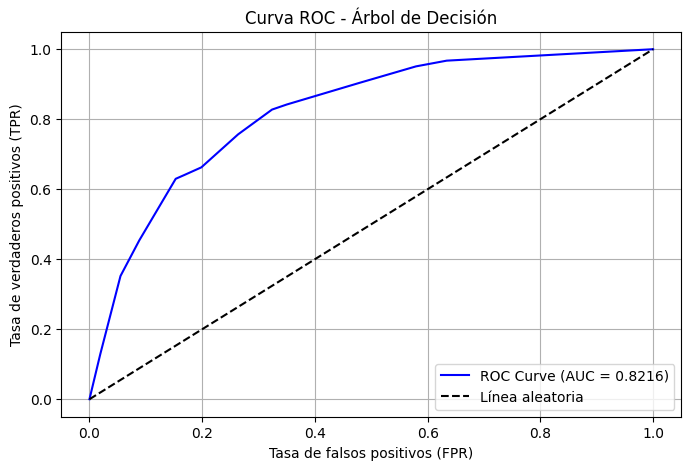

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = modelo_arbol.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Línea aleatoria')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Árbol de Decisión')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [76]:
from sklearn.metrics import roc_auc_score
print(f'El área bajo la curva ROC es: {roc_auc_score(y_test, y_scores)}')

El área bajo la curva ROC es: 0.8215513174742233


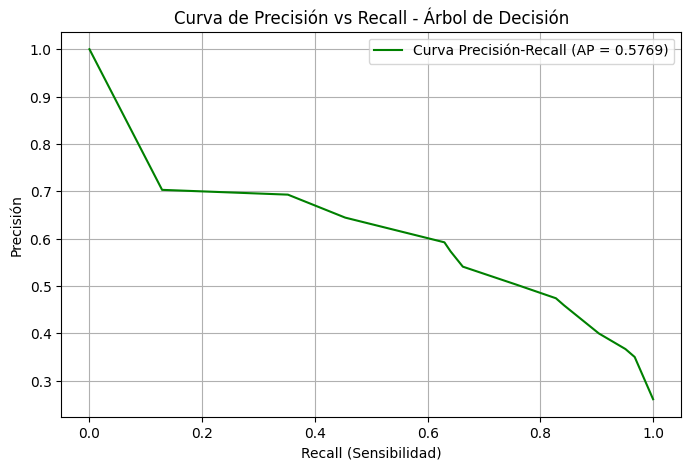

In [77]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_scores = modelo_arbol.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='green', label=f'Curva Precisión-Recall (AP = {average_precision:.4f})')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva de Precisión vs Recall - Árbol de Decisión')
plt.grid(True)
plt.legend()
plt.show()


In [78]:
from sklearn.metrics import average_precision_score
print(f'El score promedio de precision vs recall es: {average_precision_score(y_test, y_scores)}')

El score promedio de precision vs recall es: 0.5768820415863471


### Configurar validación cruzada

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
import numpy as np

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recall_scores = []

for train_index, val_index in kfold.split(X_encoded, y):
    X_train_fold, X_val_fold = X_encoded.iloc[train_index], X_encoded.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
    modelo.fit(X_train_fold, y_train_fold)

    y_pred = modelo.predict(X_val_fold)
    recall = recall_score(y_val_fold, y_pred)
    recall_scores.append(recall)

print("Sensibilidad (Recall) por pliegue:", recall_scores)
print(f"Sensibilidad media: {np.mean(recall_scores):.4f}")
print(f"Desviación estándar: {np.std(recall_scores):.4f}")


Sensibilidad (Recall) por pliegue: [0.4786096256684492, 0.4732620320855615, 0.3609625668449198, 0.4906166219839142, 0.446524064171123]
Sensibilidad media: 0.4500
Desviación estándar: 0.0468


###Oversampling

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import numpy as np
from scipy.stats import t

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scores = []

for train_idx, val_idx in kfold.split(X_encoded, y):

    X_train, X_val = X_encoded.iloc[train_idx], X_encoded.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

    modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
    modelo.fit(X_train_bal, y_train_bal)

    y_pred = modelo.predict(X_val)
    recall = recall_score(y_val, y_pred)
    recall_scores.append(recall)

media = np.mean(recall_scores)
desv = np.std(recall_scores, ddof=1)
n = len(recall_scores)
t_valor = t.ppf(1 - 0.025, df=n - 1)
margen_error = t_valor * (desv / np.sqrt(n))
ic_min = media - margen_error
ic_max = media + margen_error

print(f"Sensibilidad promedio: {media:.4f}")
print(f"Intervalo de confianza 95%: ({ic_min:.4f}, {ic_max:.4f})")


Sensibilidad promedio: 0.6854
Intervalo de confianza 95%: (0.6165, 0.7543)


###Pipeline para validación

In [82]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import numpy as np
from scipy.stats import t

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(max_depth=4, random_state=42))
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scores = []

for train_idx, val_idx in kfold.split(X_encoded, y):
    X_train, X_val = X_encoded.iloc[train_idx], X_encoded.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_val)
    recall = recall_score(y_val, y_pred)
    recall_scores.append(recall)

media = np.mean(recall_scores)
desv = np.std(recall_scores, ddof=1)
n = len(recall_scores)
t_valor = t.ppf(1 - 0.025, df=n - 1)
margen_error = t_valor * (desv / np.sqrt(n))
ic_min = media - margen_error
ic_max = media + margen_error

print(f"Sensibilidad promedio: {media:.4f}")
print(f"Intervalo de confianza 95%: ({ic_min:.4f}, {ic_max:.4f})")


Sensibilidad promedio: 0.6854
Intervalo de confianza 95%: (0.6165, 0.7543)


###Undersampling

In [83]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from scipy.stats import t
import numpy as np

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scores = []

for train_idx, val_idx in kfold.split(X_encoded, y):
    X_train, X_val = X_encoded.iloc[train_idx], X_encoded.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    rus = RandomUnderSampler(random_state=42)
    X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

    modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
    modelo.fit(X_train_bal, y_train_bal)

    y_pred = modelo.predict(X_val)
    recall = recall_score(y_val, y_pred)
    recall_scores.append(recall)

media = np.mean(recall_scores)
desv = np.std(recall_scores, ddof=1)
n = len(recall_scores)
t_valor = t.ppf(1 - 0.025, df=n - 1)
margen_error = t_valor * (desv / np.sqrt(n))
ic_min = media - margen_error
ic_max = media + margen_error

print(f"Sensibilidad promedio: {media:.4f}")
print(f"Intervalo de confianza 95%: ({ic_min:.4f}, {ic_max:.4f})")


Sensibilidad promedio: 0.7704
Intervalo de confianza 95%: (0.6990, 0.8419)


###Probando el modelo

 Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1562
       Churn       0.64      0.45      0.53       551

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113

 Exactitud del modelo: 0.7922


<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



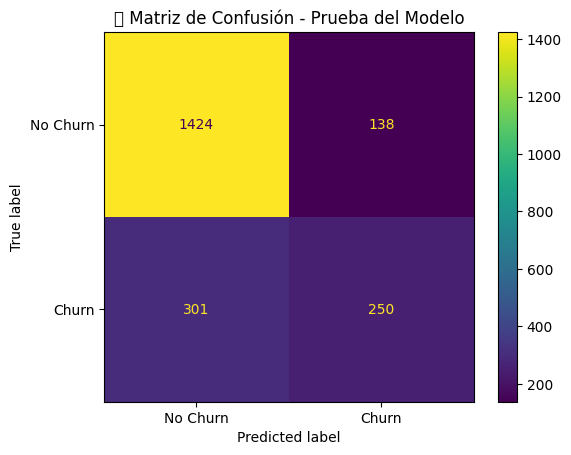

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

y_pred = modelo_arbol.predict(X_test)

print(" Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

acc = accuracy_score(y_test, y_pred)
print(f" Exactitud del modelo: {acc:.4f}")

plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["No Churn", "Churn"],
    cmap="viridis",
    colorbar=True
)
plt.title("🔍 Matriz de Confusión - Prueba del Modelo")
plt.grid(False)
plt.show()


###Análisis visual de cancelaciones

/tmp/ipython-input-85-3144641011.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-85-3144641011.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




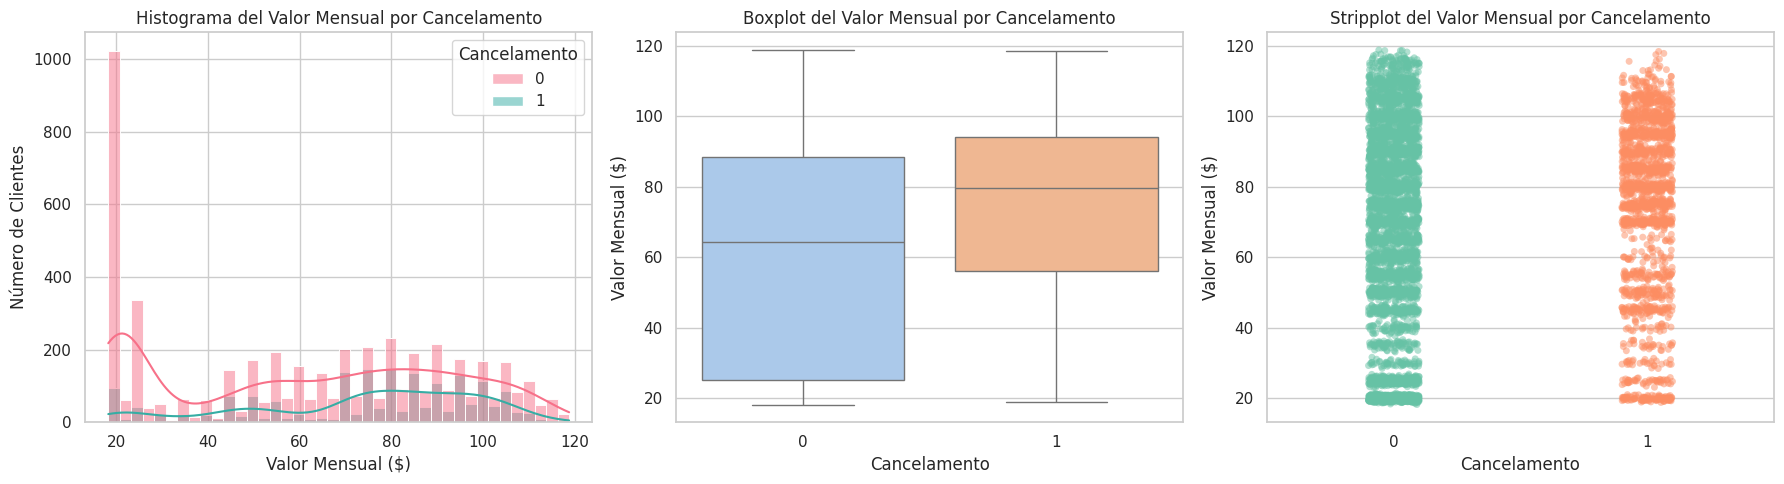

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = df.rename(columns={
    "account.Charges.Monthly": "Valor_Mensual",
    "Churn": "Cancelamento"
})

df["Valor_Mensual"] = pd.to_numeric(df["Valor_Mensual"], errors="coerce")
df = df.dropna(subset=["Valor_Mensual", "Cancelamento"])

sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x="Valor_Mensual", hue="Cancelamento", bins=40, kde=True, palette="husl")
plt.title("Histograma del Valor Mensual por Cancelamento")
plt.xlabel("Valor Mensual ($)")
plt.ylabel("Número de Clientes")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Cancelamento", y="Valor_Mensual", palette="pastel")
plt.title("Boxplot del Valor Mensual por Cancelamento")
plt.xlabel("Cancelamento")
plt.ylabel("Valor Mensual ($)")

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x="Cancelamento", y="Valor_Mensual", jitter=True, alpha=0.5, palette="Set2")
plt.title("Stripplot del Valor Mensual por Cancelamento")
plt.xlabel("Cancelamento")
plt.ylabel("Valor Mensual ($)")

plt.tight_layout()
plt.show()


#📊 Carga y análisis

###Graficas de los datos proceso de análisis###

#📄Informe final

###🔹 Introducción:###

El objetivo del presente trabajo, es realizar un análisis de la base de datosnde la empresa TelecomX y comprender el problema de evasión de clientes (Churn).


###🔹 Limpieza y Tratamiento de Datos:###
 Una vez importados los datos del enlace aportado en la pagina de GitHub con extensión de Json., se procese a trabajar los mismos en la pagina de Colab soportados en la cuenta Gmail, utilizando las bibliotecas:pandas, numpy, seaborn, matplotlib.pyplot, con el fin de procesar los mismos (crear lista, columna, conversion e identiifcacion de datos, identificacion valores nulos, normalizacion y estandarizacion, para la creacion del Data frame nuevo.

###🔹 Análisis Exploratorio de Datos:###

Con la ayuda de las bibliotecas seaborn, matplotlib, se procede a la generacion de  gráficos y visualizacionesPresenta comparativas de los análisis realizados en los diferentes item de la base de datos, calculo y representación grafica de Datos Media, Mediana y Desviación Estándar con el fin de identificar patrones.

### Conclusiones basadas en el modelo y análisis de cancelación

1) Clientes con contratos mensuales, ya que tienen mayor flexibilidad para cancelar.

2) Clientes con menos de 10 meses de permanencia (tenure) en la empresa.

3) Clientes que pagan un valor mensual alto, especialmente si tienen pocos servicios adicionales.

4) Usuarios que no contratan servicios adicionales como soporte técnico, respaldo en línea o seguridad.

5) Aquellos con interacciones limitadas o baja fidelidad detectada por el modelo.

###  ¿Qué variables influyen más en este comportamiento?###

1) Tipo de contrato
Contratos mensuales presentan mayor tasa de cancelación.

2) Valor mensual (MonthlyCharges)
Clientes que pagan tarifas altas tienden a cancelar más, posiblemente por percepción de bajo valor recibido.

3) Tiempo de permanencia (tenure)
Los clientes nuevos son más propensos a abandonar el servicio.

4) Uso de servicios adicionales
La falta de servicios como protección de dispositivos, soporte técnico y TV o internet reduce la retención.

5) Forma de pago
Pagos electrónicos automáticos están asociados con menor tasa de cancelación que pagos mensuales manuales.

###¿Qué tipo de perfil necesita la empresa para mantenerse más cerca?

1) Clientes que inician contrato anual o de largo plazo, mediante incentivos o beneficios exclusivos.

2) Clientes nuevos en sus primeros 3–6 meses, que requieren acompañamiento para evitar abandono temprano.

3) Usuarios multicanal (TV + Internet + Línea telefónica) que usan más servicios y valoran el ecosistema completo.

4) Clientes que usan servicios adicionales, como soporte técnico, respaldo, antivirus y facturación digital.

5) Segmentos sensibles al precio, a quienes se les puede ofrecer planes personalizados o escalables.

&) Usuarios con potencial de fidelización, detectados por modelos predictivos, para aplicar estrategias de retención proactiva.

###Recomendaciones Finales

🧠 1. Implementar un sistema de monitoreo de cancelación anticipada
Usar el modelo predictivo entrenado para identificar clientes con alto riesgo de cancelación.

Establecer alertas internas cuando un cliente cumpla ciertas condiciones de riesgo (por ejemplo, contrato mensual + alta tarifa + baja antigüedad).

🎯 2. Personalizar la estrategia de retención
Ofrecer descuentos o beneficios exclusivos a clientes nuevos durante los primeros meses.

Promover la migración a contratos anuales o bienales, mostrando los beneficios en ahorro o servicios adicionales.

Crear campañas personalizadas para clientes con bajo uso de servicios, incentivando la contratación de más productos.

💬 3. Fortalecer la experiencia del cliente en los primeros meses
Establecer un protocolo de bienvenida y seguimiento proactivo en los primeros 90 días.

Recoger feedback con encuestas cortas de satisfacción y actuar con rapidez ante quejas.

📈 4. Rediseñar los planes de precios
Analizar el segmento de clientes con altos valores mensuales y evaluar si sus beneficios percibidos justifican el precio.

Introducir planes escalonados o con valor agregado para mantener clientes con presupuesto ajustado.

🔄 5. Continuar mejorando el modelo predictivo
Incluir nuevas variables de comportamiento (uso del servicio, interacciones con soporte, historial de pagos).

Aplicar modelos más complejos (Random Forest, XGBoost) y comparar su desempeño con el árbol de decisión actual.

Mantener el modelo actualizado con datos recientes y retroalimentación real del área de servicio al cliente.

